In [2]:
import pyodbc as od
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

from scipy import stats
from scipy.stats import skew #for some statistics

In [33]:
cnxn = od.connect("DSN=PredictiveMaintenance;UID=sa;PWD=!Locks123")
query = f"Select * from TrainingData3"

data = pd.read_sql(query,cnxn)

In [34]:
data.describe()

,machineID,VoltageMean,RotateMean,PressureMean,VibrationMean,VoltageStd,RotateStd,PressureStd,VibrationStd,age,Error1,Error2,DaysComp1Maint,DaysComp2Maint,FailureChance
count,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000,25412.000000
mean,12.057689,159.907945,286.267726,94.816880,36.541012,5.285913,19.042844,5.208073,2.277408,8.257831,0.022769,0.009095,904.800134,904.800134,0.216748
std,5.963010,0.996197,3.536925,0.967798,0.425606,1.060690,3.810851,1.038842,0.455870,4.418830,0.003786,0.001516,393.822200,393.822200,0.412038
min,4.000000,156.729858,275.248627,91.413513,35.212082,1.846976,7.690718,1.880631,0.927888,2.000000,0.009953,0.003923,98.000000,98.000000,0.000000
25%,8.000000,159.206257,283.814102,94.140835,36.242248,4.531836,16.325758,4.477034,1.951542,5.000000,0.020126,0.008033,888.000000,888.000000,0.000000
50%,10.000000,159.853424,286.104446,94.773438,36.521170,5.213499,18.774157,5.141193,2.250483,7.000000,0.022600,0.009023,1046.000000,1046.000000,0.000000
75%,13.000000,160.553024,288.513939,95.438822,36.815772,5.968813,21.515164,5.863671,2.575251,10.000000,0.025227,0.010076,1181.000000,1181.000000,0.000000
max,24.000000,164.672516,308.895050,100.018433,38.461388,10.236145,36.656792,10.688460,4.407508,17.000000,0.041770,0.016480,1343.000000,1343.000000,1.000000


array([[<AxesSubplot:title={'center':'DaysComp1Maint'}>,
        <AxesSubplot:title={'center':'DaysComp2Maint'}>,
        <AxesSubplot:title={'center':'Error1'}>,
        <AxesSubplot:title={'center':'Error2'}>],
       [<AxesSubplot:title={'center':'FailureChance'}>,
        <AxesSubplot:title={'center':'PressureMean'}>,
        <AxesSubplot:title={'center':'PressureStd'}>,
        <AxesSubplot:title={'center':'RotateMean'}>],
       [<AxesSubplot:title={'center':'RotateStd'}>,
        <AxesSubplot:title={'center':'VibrationMean'}>,
        <AxesSubplot:title={'center':'VibrationStd'}>,
        <AxesSubplot:title={'center':'VoltageMean'}>],
       [<AxesSubplot:title={'center':'VoltageStd'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'machineID'}>, <AxesSubplot:>]],
      dtype=object)

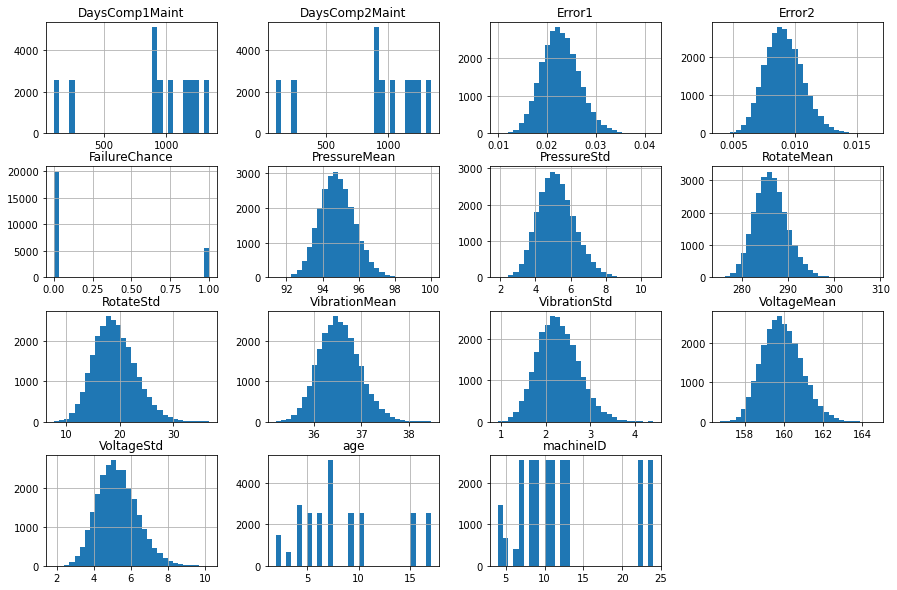

In [35]:
data.hist(bins=30, figsize=(15, 10))

In [36]:
df = data
silic_corr = df.corr()['FailureChance']
silic_corr = abs(silic_corr).sort_values()
silic_corr

VoltageMean       0.001528
VoltageStd        0.004093
VibrationStd      0.013594
VibrationMean     0.013746
PressureMean      0.243437
RotateMean        0.246458
age               0.273673
machineID         0.281547
DaysComp1Maint    0.287053
DaysComp2Maint    0.287053
Error1            0.298438
Error2            0.306213
RotateStd         0.354079
PressureStd       0.360911
FailureChance     1.000000
Name: FailureChance, dtype: float64

In [37]:
df.corr()

,machineID,VoltageMean,RotateMean,PressureMean,VibrationMean,VoltageStd,RotateStd,PressureStd,VibrationStd,age,Error1,Error2,DaysComp1Maint,DaysComp2Maint,FailureChance
machineID,1.000000,-0.013907,-0.003733,-0.004931,0.006486,-0.008211,-0.007529,-0.001196,0.005369,0.992872,-0.002705,0.002603,-0.996423,-0.996423,0.281547
VoltageMean,-0.013907,1.000000,-0.003259,-0.000553,0.001859,0.710452,-0.006941,-0.006093,-0.001079,-0.015373,0.012632,0.002814,0.012369,0.012369,0.001528
RotateMean,-0.003733,-0.003259,1.000000,-0.000101,0.004113,-0.004814,0.699450,-0.003954,0.011293,-0.002682,0.007214,-0.004688,0.003510,0.003510,0.246458
PressureMean,-0.004931,-0.000553,-0.000101,1.000000,0.001516,-0.003176,-0.004747,0.707133,0.000085,-0.004840,0.000981,0.001122,0.005798,0.005798,0.243437
VibrationMean,0.006486,0.001859,0.004113,0.001516,1.000000,-0.003412,0.004666,0.001741,0.707126,0.006055,0.003854,-0.000525,-0.006734,-0.006734,0.013746
VoltageStd,-0.008211,0.710452,-0.004814,-0.003176,-0.003412,1.000000,-0.004705,-0.007556,-0.000184,-0.009725,0.013397,-0.000949,0.007400,0.007400,0.004093
RotateStd,-0.007529,-0.006941,0.699450,-0.004747,0.004666,-0.004705,1.000000,-0.006297,0.013517,-0.006388,0.004007,-0.002890,0.007899,0.007899,0.354079
PressureStd,-0.001196,-0.006093,-0.003954,0.707133,0.001741,-0.007556,-0.006297,1.000000,-0.001418,-0.001490,0.003204,0.011258,0.001535,0.001535,0.360911
VibrationStd,0.005369,-0.001079,0.011293,0.000085,0.707126,-0.000184,0.013517,-0.001418,1.000000,0.005339,0.009533,0.004035,-0.005030,-0.005030,0.013594
age,0.992872,-0.015373,-0.002682,-0.004840,0.006055,-0.009725,-0.006388,-0.001490,0.005339,1.000000,-0.003365,0.001452,-0.984473,-0.984473,0.273673
